# Supervised Learning with scikit-learn


## Classification

In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. Classification problems are prevalent in a variety of domains, ranging from finance to healthcare. Here, you will have the chance to apply what you are learning to a political dataset, where you classify the party affiliation of United States Congressmen based on their voting records.

> Machine learning : Art and science of giving computers the ability to learn to make decisions from data without being explictly programmed. 

### Types of learning 


* Unsupervised learning : unlabeled data, we try to uncover hidden patterns from unlabeled data. Ex. Grouping customers into different categories based on their behaviour but we don't know in advance which are going to be these categories (this is called **clustering**). 


* Reinforcement learning : the agent interacts with an environment. The agent is able to optimize its behaviour depending on the environment -it learns-, due to a rewards/punishment system inspired from the behavioral psychology. It has a lot of applications: economics, games, genetics. Ex. AlphaGo 2015.


* Supervised learning : labeled data. We work with features and target variables -the labels-. The challenge here, is based on the features variables or predictor variables (or independent variables), try to predict the target variable (or dependent or response variable). IF:

        * > The target variable consists of categories --> classification problem
        * > The target variable is continous --> regression problem


### Which of these is a classification problem?

Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem is better suited to classification or regression. This exercise will help you develop your intuition for distinguishing between the two.

Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?

* [X]Using labeled financial data to predict whether the value of a stock will go up or go down next week.
* [_]Using labeled housing price data to predict the price of a new house based on various features.
* [_]Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
* [_]Using labeled financial data to predict what the value of a stock will be next week.

### The classification challenge

#### k-nearest neighbours

The idea behind, is to predict the label of a data point by looking at the ‘k’ closest labeled data points. 


In [22]:
# Read file and import df from file

df = pd.read_csv("mldatasets/df_party.txt")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 18 columns):
Unnamed: 0           435 non-null int64
party                435 non-null object
infants              435 non-null int64
water                435 non-null int64
budget               435 non-null int64
physician            435 non-null int64
salvador             435 non-null int64
religious            435 non-null int64
satellite            435 non-null int64
aid                  435 non-null int64
missile              435 non-null int64
immigration          435 non-null int64
synfuels             435 non-null int64
education            435 non-null int64
superfund            435 non-null int64
crime                435 non-null int64
duty_free_exports    435 non-null int64
eaa_rsa              435 non-null int64
dtypes: int64(17), object(1)
memory usage: 61.2+ KB
None


,Unnamed: 0,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [15]:
df.values

array([[0, 'republican', 0, ..., 1, 0, 1],
       [1, 'republican', 0, ..., 1, 0, 1],
       [2, 'democrat', 0, ..., 1, 0, 0],
       ..., 
       [432, 'republican', 0, ..., 1, 0, 1],
       [433, 'republican', 0, ..., 1, 0, 1],
       [434, 'republican', 0, ..., 1, 0, 0]], dtype=object)

In [14]:
# Import pandas
import pandas as pd

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values # drop() method removes 'party' column, which contains labels, from the features

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### k-Nearest Neighbors: Predict

In [21]:
# Load and create dataframe from file
X_new = pd.read_csv("mldatasets/X_new.txt")
print(X_new.info())
X_new.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 17 columns):
Unnamed: 0    1 non-null int64
0             1 non-null float64
1             1 non-null float64
2             1 non-null float64
3             1 non-null float64
4             1 non-null float64
5             1 non-null float64
6             1 non-null float64
7             1 non-null float64
8             1 non-null float64
9             1 non-null float64
10            1 non-null float64
11            1 non-null float64
12            1 non-null float64
13            1 non-null float64
14            1 non-null float64
15            1 non-null float64
dtypes: float64(16), int64(1)
memory usage: 216.0 bytes
None


,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,0.322981,0.862084,0.310688,0.750776,0.538754,0.736589,0.521465,0.984811,0.012442,0.746899,0.990327,0.765476,0.132453,0.322978,0.281737,0.43129


In [11]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))


   Unnamed: 0         0         1         2         3         4         5  \
0           0  0.322981  0.862084  0.310688  0.750776  0.538754  0.736589   

          6         7         8         9        10        11        12  \
0  0.521465  0.984811  0.012442  0.746899  0.990327  0.765476  0.132453   

         13        14       15  
0  0.322978  0.281737  0.43129  
Prediction: ['democrat']


Did your model predict 'democrat' or 'republican'? How sure can you be of its predictions? In other words, how can you measure its performance? This is what you will learn in the next video.

### Measuring model performance --> Accuracy

In classification problems, accuracy is the commonly metric used. Accuracy is the fraction of correct predictions computed from the testing data. You usually split your dataset into training data, and testing data. Yo do not use your testing data for training, otherwise the model won't be able to generalize well. Testing data is a dataset not seen before by the model:

* You fit/train your data on the training set
* You make predictions on the testing set
* The compare predictions with the known labels

#### Model complexity




### The digits recognition dataset MNIST

In the following exercises, you'll be working with the MNIST digits recognition dataset, which has 10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise.

Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type Bunch, which are dictionary-like objects: 


* scikit-learn provides an 'images' key in addition to the 'data' and 'target' keys. It is a 2D array of the images corresponding to each sample, this 'images' key is useful for visualizing the image:  

* On the other hand, the 'data' key contains the feature array - that is, the images as a flattened array of 64 pixels.

* Notice that you can access the keys of these **Bunch objects ** in two different ways: By using the . notation, as in digits.images, or the [] notation, as in digits['images']




dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

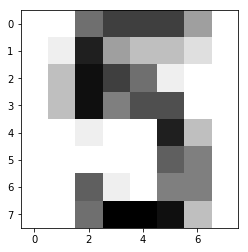

In [19]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [20]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors =7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.983333333333


In [26]:
X_train[0][10], y_train[0]

(16.0, 5)

### Overfitting and underfitting

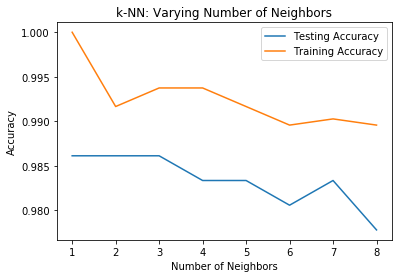

In [28]:
import numpy as np

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.

## Regression

In the previous chapter, you made use of image and political datasets to predict binary as well as multiclass outcomes. But what if your problem requires a continuous outcome? Regression, which is the focus of this chapter, is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data.